1.6 Квартили распределения и график box-plot

Квантили - делят упорядоченные данные на некоторое число равных частей


Квартили - частный случай квантилей, делят данные на 4 равные части

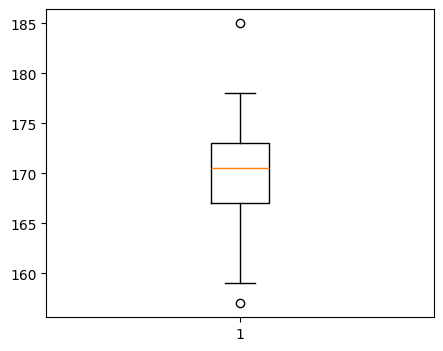

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# желтая линия - 2 квартиль(медиана) = (170+171) / 2 = 170.5
# нижняя часть "коробки" - 1 квартиль - 167
# верхняя часть "коробки - 3 квартиль - 173
# 159 - 1.5 межквартильного размаха "вниз"
# 179 - 1.5 межквартильного размаха "вверх"
# 157, 185 - выбросы
data = np.array([157, 159, 161, 164, 165, 166, 167, 167, 167, 168, 169, 169, 170, 170, 170,
                 171, 171, 172, 172, 172, 172, 173, 173, 175, 175, 177, 178, 178, 178, 185])
    
fig = plt.figure(figsize =(5, 4))
plt.boxplot(data)
 
plt.show()

Желтая линия - медиана (2ой квартиль)

Верхняя граница "коробки" - 3ий квартиль

Нижняя граница - 1ый квартиль

Расстояние между 1 и 3 квартилями - 50% всех наблюдений, или межквартильный размах. Чем больше такой размах, тем больше вариативность признака.

1.7 Нормальное распределение

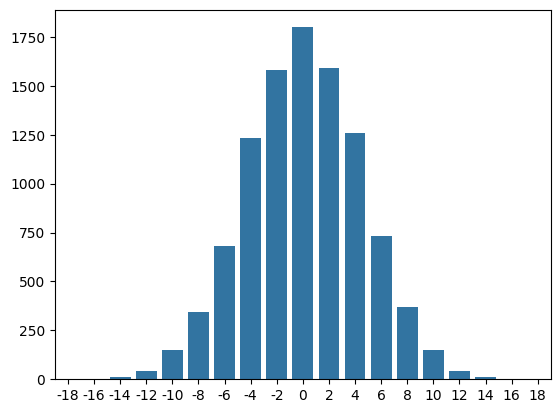

In [2]:
import seaborn as sns

data = dict()
# количество шариков
N = 10000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

Z-шкала 

![alt text](download.png)

Z-шкала позволяет оценить, насколько далеко отдельно взятое наблюдение лежит от выборочного среднего, в единицах стандартного отклонения. (Под расстоянием подразумевается разница числовых значений) 


Соответственно, если z-score меньше 0, наблюдение меньше выборочного среднего и в распределении лежит слева от него. Если z-score равно 0, значит данное наблюдение совпадает с выборочным средним

In [3]:
"""Допустим, что некоторый признак распределен нормально, выборочное среднее
   равняется 100, а дисперсия равняется 25 (M = 100, D = 25).
   Тогда приблизительно 95% всех наблюдений находится в диапазоне:"""

M = 100
D = 25
sd = D**0.5
# Поскольку 95% от всех значений находятся в диапазоне +-2σ, то мин/макс занчения z = +-2
z_min = -2
z_max = 2

# z = (x-M)/sd
x_min = z_min*sd + M
x_max = z_max*sd + M
print('Приблизительно 95% всех наблюдений находится в диапазоне ', [x_min, x_max])

Приблизительно 95% всех наблюдений находится в диапазоне  [90.0, 110.0]


In [5]:
from scipy import stats
"""Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
   со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
   Какой приблизительно процент людей обладает IQ > 125?"""

M = 100
sd = 15
x_min = 125

z = (x_min - M) / sd 
print("Процент людей с IQ выше 125 =", round((1 - stats.norm.cdf(z)) * 100))

Процент людей с IQ выше 125 = 5


In [6]:
"""Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
   со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
   Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?"""

M = 100
sd = 15

x_min = 70
x_max = 112

z_min = (x_min - M) / sd
z_max = (x_max - M) / sd

print("Процент людей с IQ выше 70 и ниже 112 =", round((1 - stats.norm.cdf(z_min)) * 100 - 
                                                       (1 - stats.norm.cdf(z_max)) * 100))

Процент людей с IQ выше 70 и ниже 112 = 77


1.8 Центральная предельная теорема

Данная теорема гласит, что множество выборочных средних случайно взятых из некой ГС выборок (ГС не обязательно иметь нормальное распределение) всегда будет распределено нормально, при этом среднее значение всех таких средних будет близко к среднему генеральной совокупности, а стандартной отклонение sd таких средних будет называть standard error (se). 

Зная стандартное отклонение ГС и размер выборки (у всех выборок размер одинаковый) можно посчитать se:

![alt text](download-1.png)

Если размер выборок больше 30, и она является репрезентативной, то вместо стандартного отклонения ГС берется стандартное отклонение выборки:

![alt text](download-2.png)

<Axes: ylabel='Frequency'>

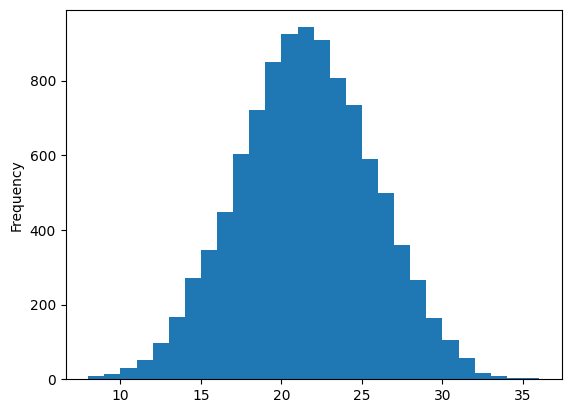

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Формирование ГС
# значения игральной кости
dice = [1, 2, 3, 4, 5, 6]
# количество бросков кости
count = 6
# размер ГС
# sp - Statistical population - генеральная совокупность
sp_size = 10000
sp = pd.Series(dtype=np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value

sp.plot.hist(bins=28)

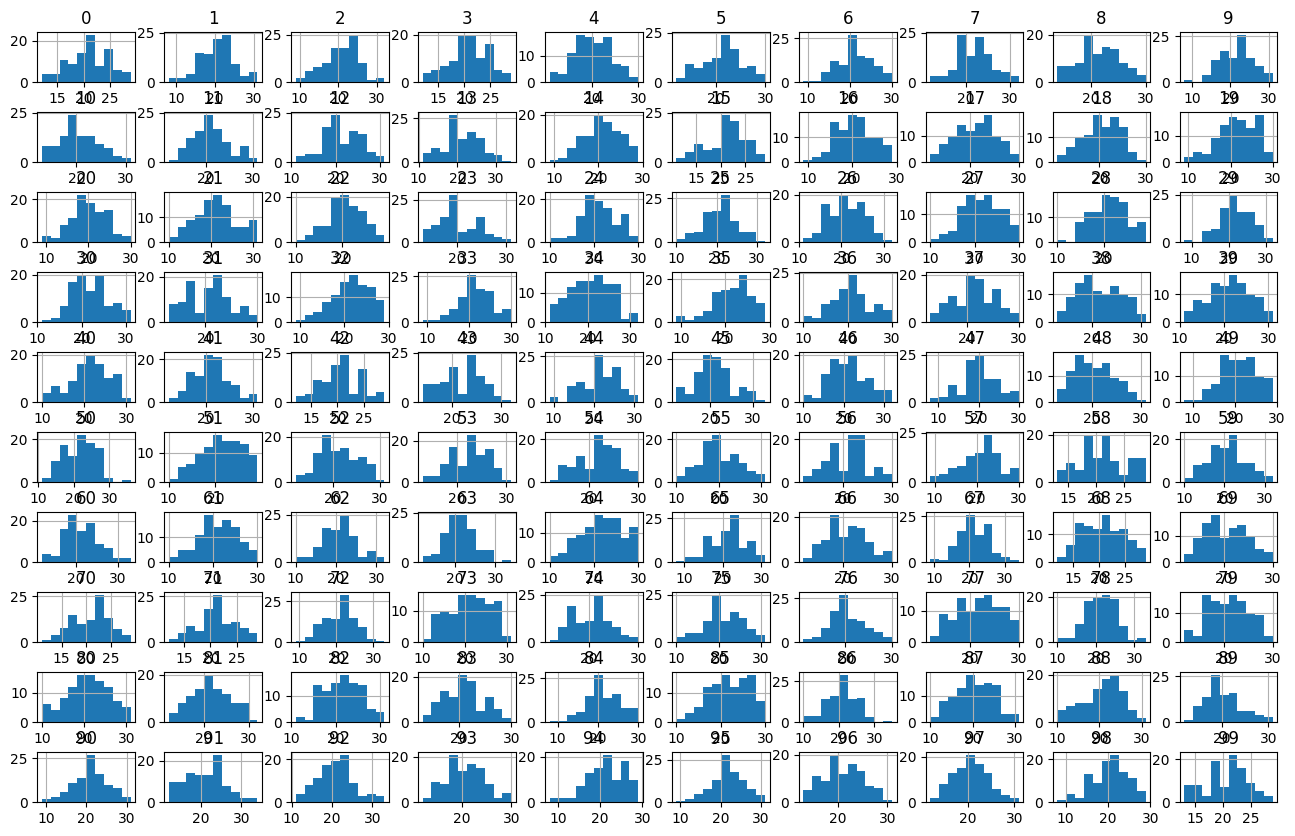

In [8]:
"""Распределение выборочных средних является нормальным, со средним =(стремящимся к) среднему зачению в ГС"""
# формирование выборок из ГС
# количество выборок
samples_count = 100
# размер выборки
sample_size = 100
samples = pd.DataFrame([[np.random.choice(sp) for _ in range(sample_size)] for __ in range(samples_count)]).T

samples.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)

In [9]:
means = samples.mean()
print('Cреднее ГС:', sp.mean(), '; Cреднее средних выборок:',  means.mean())
print('Разница:', abs(means.mean() - sp.mean()), '; Стандартная ошибка среднего:', means.std())

Cреднее ГС: 21.0102 ; Cреднее средних выборок: 20.976300000000002
Разница: 0.03389999999999915 ; Стандартная ошибка среднего: 0.43077720459652935


Что если взять произвольную выборку?

In [10]:
# произвольная выборка 
sample = samples[42]
print('sample mean:', sample.mean())
print('sample std:', sample.std())
print('sample se: ', sample.std()/math.sqrt(sample.size))

sample mean: 20.72
sample std: 3.6956977444295704
sample se:  0.369569774442957


In [11]:

"""Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100"""
M = 10
D = 4
N = 100

sd = D**0.5
se = sd / N**0.5
print('Стандартная ошибка среднего =', se)

Стандартная ошибка среднего = 0.2
